In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import joblib

df = pd.read_csv("train4.csv", encoding='latin-1')
#df.info()

#print ('Count category \n',df.label.value_counts())
#df['id'] = df.index + 1 #add new column
#df
z=['label','score','magnitude','text']
df=df[z]
df

,label,score,magnitude,text
0,-1,-0.6,0.6,@AmericanAir that's if it is ever complete and...
1,-1,-0.3,2.3,@AmericanAir this might look good but the pita...
2,-1,-0.6,1.8,@AmericanAir Where are your tickets offices in...
3,-1,-0.7,0.7,@AmericanAir has Cancelled Flighted their last...
4,1,0.0,0.1,"""LOL you guys are so on it"" - me, had this bee..."
...,...,...,...,...
14323,0,0.0,0.6,Ã¯Â¿Â½Ã¯Â¿Â½Ã¯Â¿Â½@united: @rikrik__ What made...
14324,-1,0.0,0.8,Ã¯Â¿Â½Ã¯Â¿Â½Ã¯Â¿Â½@united: @rikrik__ What made...
14325,-1,-0.3,1.1,Ã¯Â¿Â½Ã¯Â¿Â½Ã¯Â¿Â½@united: @rikrik__ What made...
14326,1,0.0,0.1,Ã¯Â¿Â½Ã¯Â¿Â½Ã¯Â¿Â½@united: Looking for a reaso...


In [3]:
a=['score','magnitude'] 
X=df[a]
b=['label'] #label

y=df[b].values.tolist()
x1=df[['score']].values.tolist()
x2=df[['magnitude']].values.tolist()

for i in range(0,len(y)):
    if y[i][0] == -1:
        y[i]=0
    elif y[i][0] == 0:
        y[i]=1
    else:
        y[i]=2
        
ind=0
while len(y)>ind :
    if (y[ind] == 0 and x1[ind][0]>0) or (y[ind] == 2 and x1[ind][0]<0):
        del y[ind]
        del x1[ind]
        del x2[ind]
    else:
        x1[ind]=x1[ind][0]
        x2[ind]= x2[ind][0]
        ind+=1
        
#list -> dataframe
X = pd.DataFrame(list(zip(x1,x2)),columns = ['score','magnitude'])
y = pd.DataFrame(y,columns = ['label'])

<AxesSubplot:xlabel='label', ylabel='score'>

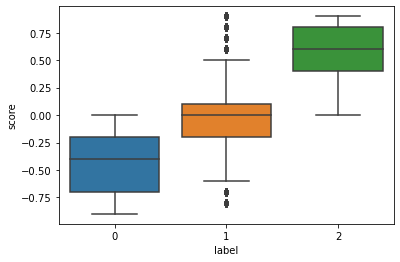

In [4]:
data = pd.concat([y,X],axis = 1)
sns.boxplot(x='label', y='score', data=data)


<AxesSubplot:xlabel='label', ylabel='magnitude'>

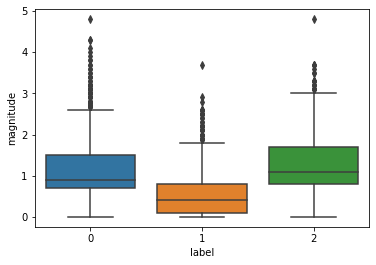

In [5]:
sns.boxplot(x='label', y='magnitude', data=data)

In [6]:
rus = RandomUnderSampler(random_state = 21)
X, y = rus.fit_sample(X, y)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()
#stratify divide the data set keeping same propotion for y
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state= 21,stratify=y)

x_train = sc.fit_transform(x_train)
x_validation = sc.transform(x_validation)
x_validation

array([[ 0.52349543, -0.49586146],
       [ 1.5228137 ,  2.50470717],
       [ 1.5228137 , -0.19580459],
       ...,
       [ 0.32363175, -0.79591836],
       [ 1.5228137 , -0.19580459],
       [ 0.72335907,  1.00442295]])

In [8]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state = 21)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'randomforestmodel.pkl') 

classifier = joblib.load('randomforestmodel.pkl')

y_pred = classifier.predict(x_validation)
print(f"Accuracy = {classifier.score(x_validation,y_validation)}")

<ipython-input-8-ba9cd9182424>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


Accuracy = 0.7840481565086531


In [9]:
cm = confusion_matrix(y_validation,y_pred)
print(cm)
print(classification_report(y_validation, y_pred))

[[376  66   1]
 [ 90 292  61]
 [ 13  56 374]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       443
           1       0.71      0.66      0.68       443
           2       0.86      0.84      0.85       443

    accuracy                           0.78      1329
   macro avg       0.78      0.78      0.78      1329
weighted avg       0.78      0.78      0.78      1329



In [10]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(random_state = 21)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_validation)

print(f"Accuracy = {classifier.score(x_validation,y_validation)}")

Accuracy = 0.7276147479307751


C:\Users\AkeshalaMarasinghe\anaconda33\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [11]:
cm = confusion_matrix(y_validation,y_pred)
print(cm)
print(classification_report(y_validation, y_pred))

[[394  48   1]
 [139 163 141]
 [ 15  18 410]]
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       443
           1       0.71      0.37      0.49       443
           2       0.74      0.93      0.82       443

    accuracy                           0.73      1329
   macro avg       0.72      0.73      0.70      1329
weighted avg       0.72      0.73      0.70      1329



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
#y_new_train = preprocessing.label_binarize(y_train, classes=[0, 1, 2])

param_test1 = {'n_estimators':range(20,81,5)}
param_test2 = {'max_depth':range(5,16,2),'min_samples_split':range(200,1001,200)}
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
param_test4 = {'max_features':range(0,20,2)}
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95,1,1.1,1.2]}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,n_estimators=75,random_state=21,max_depth=7,min_samples_split=1600,min_samples_leaf=30,max_features=2,subsample=1), 
param_grid = param_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\AkeshalaMarasinghe\anaconda33\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
C:\Users\AkeshalaMarasinghe\anaconda33\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


({'subsample': 1}, 0.7872491671323181)

In [13]:

classifier = GradientBoostingClassifier(learning_rate=0.005,n_estimators=1500,random_state=21,max_depth=7,min_samples_split=1600,min_samples_leaf=30,max_features=2,subsample=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_validation)

print(f"Accuracy = {classifier.score(x_validation,y_validation)}")
joblib.dump(classifier, 'gradientboostmodel.pkl') 

C:\Users\AkeshalaMarasinghe\anaconda33\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy = 0.7848006019563581


['gradientboostmodel.pkl']

In [14]:
cm = confusion_matrix(y_validation,y_pred)
print(cm)
print(classification_report(y_validation, y_pred))

[[378  64   1]
 [ 92 293  58]
 [ 15  56 372]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       443
           1       0.71      0.66      0.68       443
           2       0.86      0.84      0.85       443

    accuracy                           0.78      1329
   macro avg       0.78      0.78      0.78      1329
weighted avg       0.78      0.78      0.78      1329



In [24]:
classifier = joblib.load('randomforestmodel.pkl')
x=[[0.8, 1.1],[0.1,0.8],[-0.5,0.7]]
a=np.asarray(x,dtype =float)
prediction = classifier.predict(a)


In [26]:
print(type(prediction))

<class 'numpy.ndarray'>
